In [41]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df1=pd.read_csv("emp_esk.csv")

In [43]:
df=df1.copy()

In [44]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [45]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace = True)

In [46]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [47]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

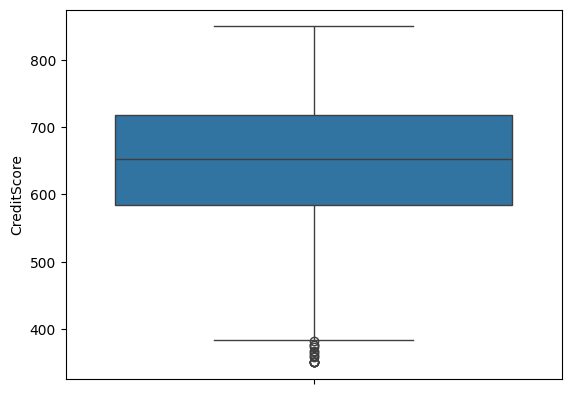

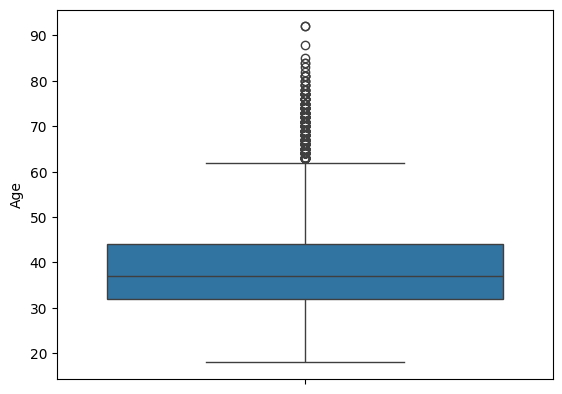

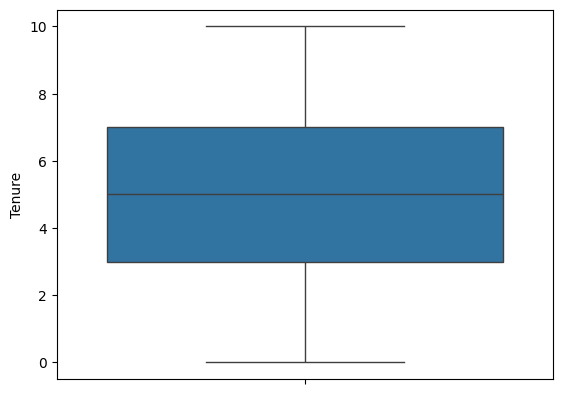

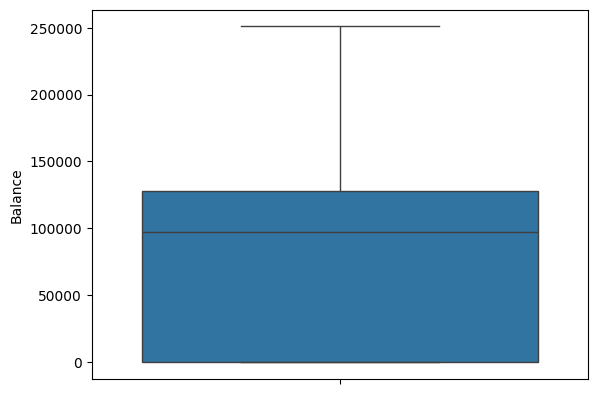

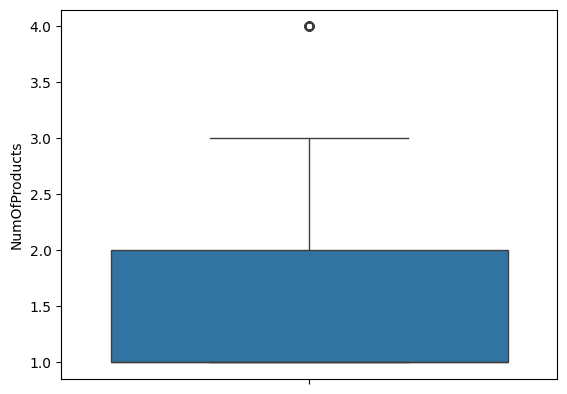

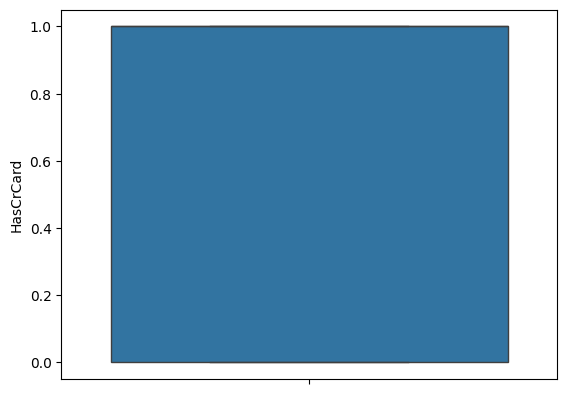

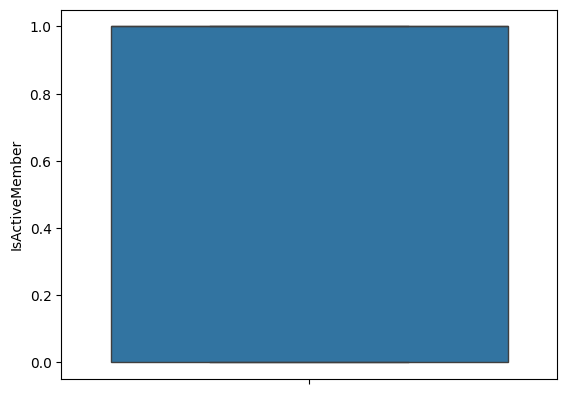

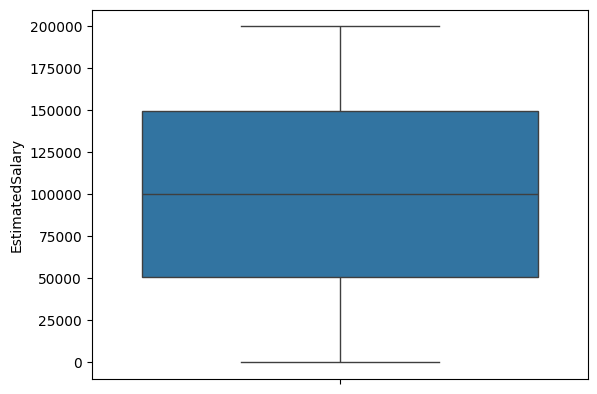

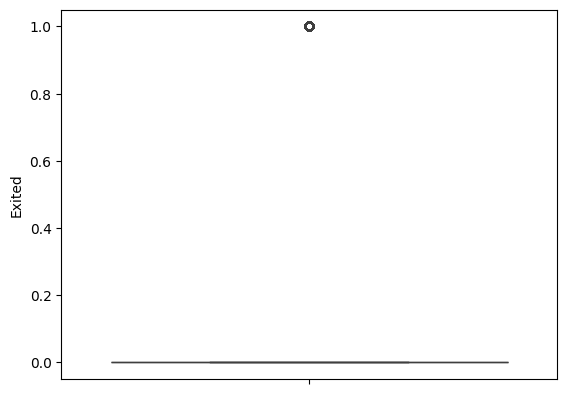

In [48]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(df[i])
    plt.show()

In [49]:
def out(col):
    q1 , q3 =np.percentile(col,[25,75])
    iqr = q3-q1
    ll =q1-1.5*iqr
    ul = q3+1.5*iqr
    return ll , ul

In [50]:
out_list = ["CreditScore", "Age"]
for i in out_list:
    ll, ul = out(df[i])
    df[i] = np.where(df[i] < ll, ll, df[i])
    df[i] = np.where(df[i] > ul, ul, df[i])

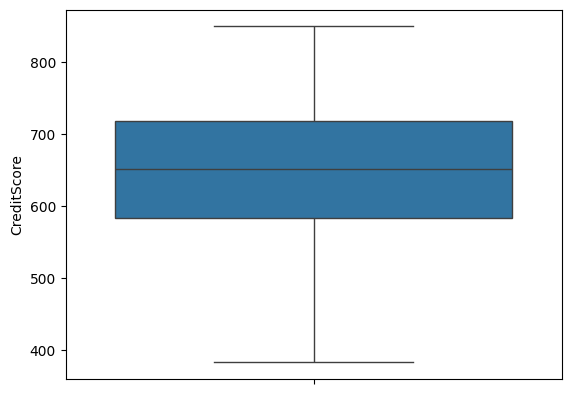

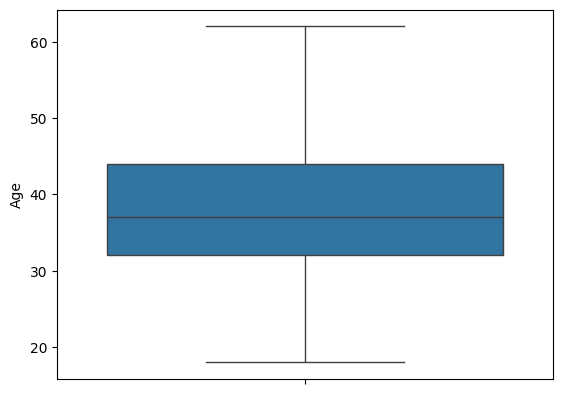

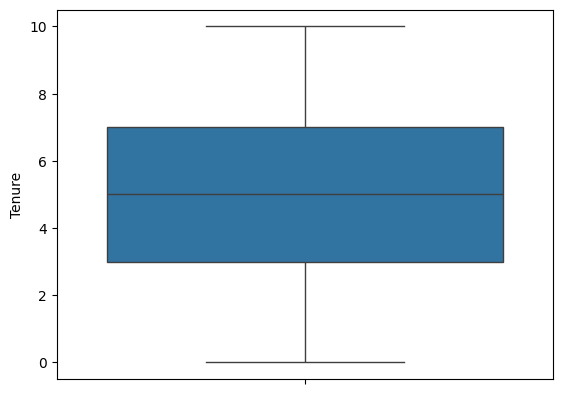

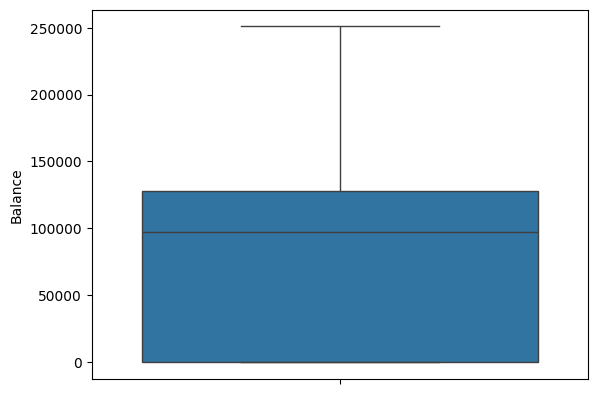

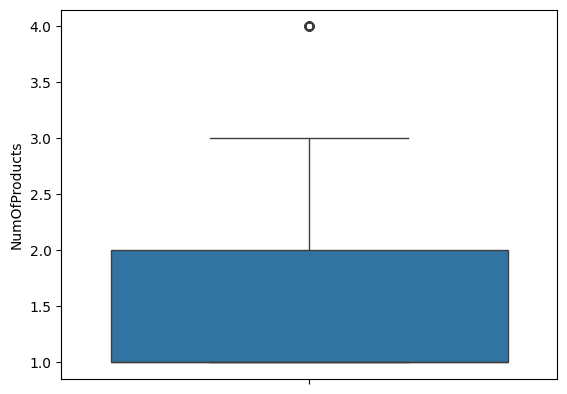

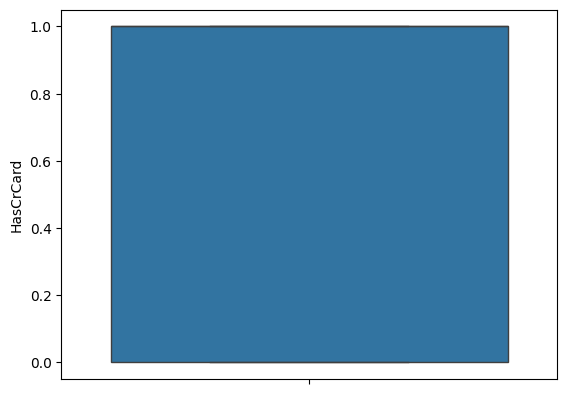

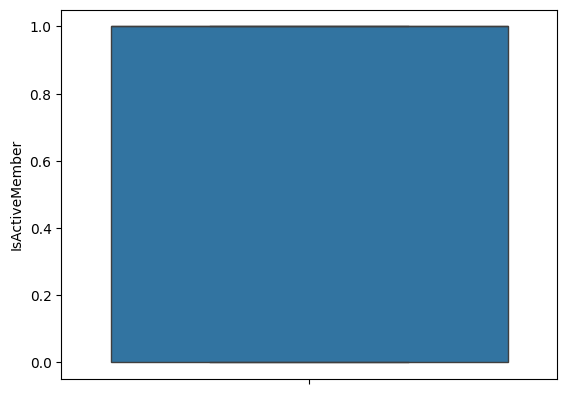

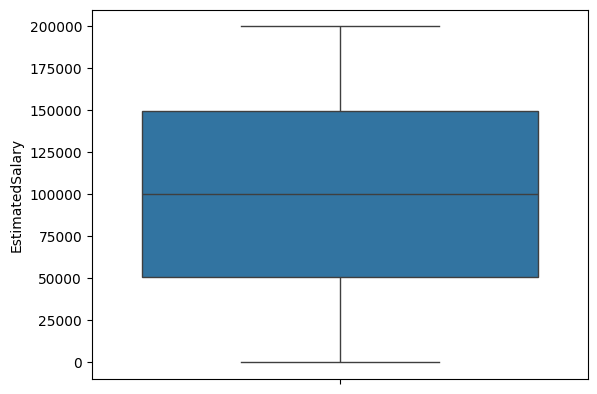

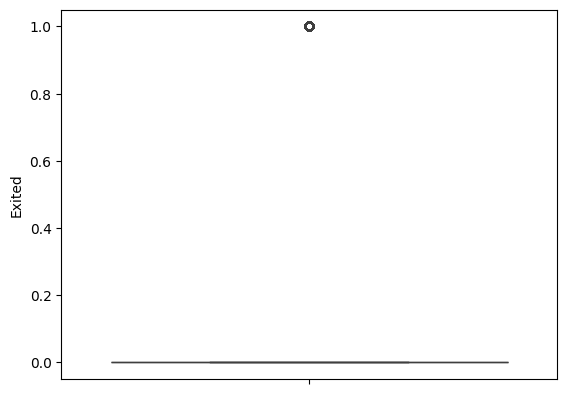

In [51]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(df[i])
    plt.show()

In [52]:
# if it is a nominal data we use the get dummes
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True,dtype="int64")

In [53]:
df.head(1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2,0.0,1,1,1,101348.88,1,0,0,0


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# df['encoded_column'] = label_encoder.fit_transform(df['categorical_column'])

In [ ]:
# target varibale is "Exited"
x=df.drop(columns=["Exited"])
y=df["Exited"].values # getting those in a single line of array

In [55]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [57]:
#split the data in to train and test 
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# do a standard scalar to do a values it a equla manner right 
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_train_ss = ss.transform(x_test)

In [ ]:
# ANN model is a sequnecial model so every layesrs are sequal order
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential # connection
from tensorflow.keras.layers import Dense # hiden layers

In [ ]:
model =Sequential() # creating object and store in a model variable

model.add(Dense(11,activation="relu",input_dim=11)) # its not depend on input count its our wish
model.add(Dense(11,activation="relu"))  # heare also 
model.add(Dense(1,activation="sigmoid"))
model.summary()  # it shoe the table like data

# layers are hyperperametric values -- meanse take a value to tral and error

# we can replace the 11 to any number bhut based on the accurasy score we will 
# we will increase the values it will increase the perfomence of the dta
# and some times it make over fiting


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# fiting the model

model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
history = model.fit (x_train , y_train , batch_size=55,epochs=100,verbose=1,validation_split=0.2) # verbose show the values of each epock

Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6676 - loss: 58.0457 - val_accuracy: 0.7981 - val_loss: 30.9454
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6798 - loss: 16.5526 - val_accuracy: 0.6575 - val_loss: 13.6480
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - loss: 18.0082 - val_accuracy: 0.7506 - val_loss: 17.6360
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6788 - loss: 22.8175 - val_accuracy: 0.5337 - val_loss: 17.2091
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6813 - loss: 18.1303 - val_accuracy: 0.7819 - val_loss: 16.1722
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6715 - loss: 16.8206 - val_accuracy: 0.7981 - val_loss: 24.6449
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6868 - loss: 24.3831 - val_accuracy: 0.7950 - val_loss: 21.0088
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6698 - loss: 29.

In [79]:
 # finding the accurasy separatelyy
y_pred = model.predict(x_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[9.9989915e-01],
       [7.2565505e-20],
       [7.8116989e-07],
       ...,
       [4.7857353e-05],
       [3.9380478e-16],
       [9.9993432e-01]], dtype=float32)

In [80]:
y_pred = y_pred.argmax(axis=1)

In [82]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test , y_pred)
ac

0.8035